# A simple neural network 

## MNIST dataset

Comes in four NumPy arrays

In [30]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Train labels

In [31]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Train images 

In [32]:
train_images.shape

(60000, 28, 28)

In [9]:
train_images.ndim

3

In [11]:
train_images.dtype

dtype('uint8')

In [33]:
train_images[4]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

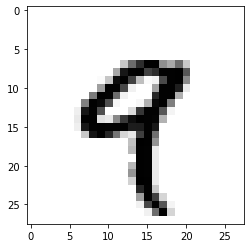

In [34]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

### Reshaping

Convert the train images and test images to the necessary input shape of the neural network

In [35]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

New shape

In [38]:
train_images[4].shape

(784,)

In [37]:
28 * 28

784

In [39]:
train_images[4]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

### Normalization

In [40]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

New values between zero and one

In [41]:
train_images[4]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Categorical encoding of the labels

In [42]:
train_labels[4]

9

In [43]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [44]:
train_labels[4]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

## Neural network

### Build the neural network

In [47]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()

network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

### Train the network

In [48]:
network.fit(train_images, 
            train_labels, 
            epochs=5, 
            batch_size=128)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 48us/sample - loss: 0.2541 - acc: 0.9262
Epoch 2/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.1039 - acc: 0.9696
Epoch 3/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.0684 - acc: 0.9798
Epoch 4/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.0496 - acc: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 26us/sample - loss: 0.0369 - acc: 0.9887


Test the network

In [49]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 32us/sample - loss: 0.0643 - acc: 0.9810


Accuracy

In [50]:
print('test_acc:', test_acc)

test_acc: 0.981
